In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('owid-covid-data.csv', parse_dates=['date'])

In [99]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [100]:
import numpy as np

Аппроксимация прямой

In [101]:
def fit_line(points):

    points = np.log(points)
    points[points == -np.inf] = 0
    r = np.polyfit([p[0] for p in points], [p[1] for p in points], 1)
    print(f"y = {r[0]:.2f}x + {r[1]:.2f}")
    return r[0], r[1]

fit_line(np.random.rand(21, 2))
# fit_line(np.array([[0, 0], [0, 1], [0, 2], [0, 3]]))
fit_line(np.array([[0, 3], [1, 4], [2, 5], [3, 6]]))

y = 0.06x + -0.58
y = 0.51x + 1.25


<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


(0.5056565522726152, 1.2450222789346217)

In [102]:
x = np.linspace(-100.,100.)

In [103]:
def findR0(a):
  G = 6.5
  k = 16.25
  ro = G * a
  if a < 0:
    return 0
  return (1 + k*ro) ** (1/k)


#Italy

In [104]:
ch_cases = pd.DataFrame()
ch_cases['Date'] = df['date']
ch_cases['Cases'] = df['new_cases']
ch_cases['Location'] = df['location']
ch_cases = ch_cases.loc[(ch_cases['Location'] == 'Italy')]
ch_cases = ch_cases.loc[(ch_cases['Date'] < '2020-03-15')]
ch_cases = ch_cases.drop(columns='Location')
ch_cases = ch_cases.dropna()
ch_cases['Cases'] = ch_cases['Cases'].astype(int)
ch_cases = ch_cases.set_index('Date')['Cases']
ch_cases

Date
2020-01-31       2
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       1
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
2020-02-16       0
2020-02-17       0
2020-02-18       0
2020-02-19       0
2020-02-20       0
2020-02-21      17
2020-02-22      42
2020-02-23      93
2020-02-24      74
2020-02-25      93
2020-02-26     131
2020-02-27     202
2020-02-28     233
2020-02-29     240
2020-03-01     566
2020-03-02     342
2020-03-03     466
2020-03-04     587
2020-03-05     769
2020-03-06     778
2020-03-07    1247
2020-03-08    1492
2020-03-09    1797
2020-03-10     977
2020-03-11    2313
2020-03-12    2651
2020-03-13    2547
2020-03-14    3497
Name: Cases, dtype: int64

In [105]:
len(ch_cases)

44

In [106]:
res = ch_cases.to_numpy()
vals = []
for i in range(len(res)):
  vals.append([i, res[i]])
vals =np.array(vals)

In [107]:
variant1 = vals[:10]
a, b = fit_line(variant1)

y = -0.15x + 0.26


<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


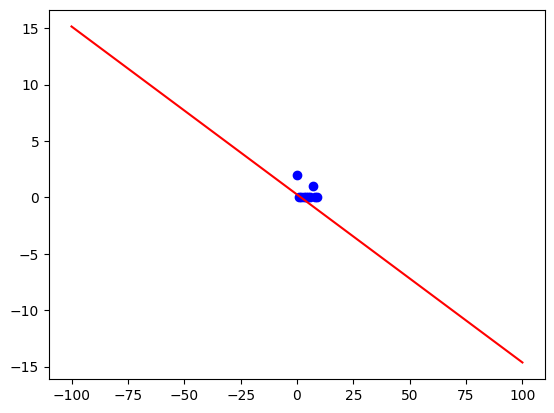

In [108]:
plt.scatter(variant1[:,0], variant1[:,1],  c ="blue")
plt.plot(x,a*x+b,  c ="red")
plt.show()

In [109]:
findR0(a)

0

In [110]:
variant2 = vals[:20]
a, b = fit_line(variant2)

y = -0.09x + 0.20


<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


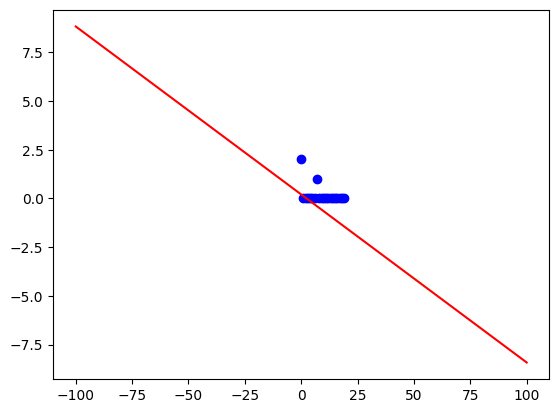

In [111]:
plt.scatter(variant2[:,0], variant2[:,1],  c ="blue")
plt.plot(x,a*x+b,  c ="red")
plt.show()

In [112]:
findR0(a)

0

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = 1.29x + -1.67


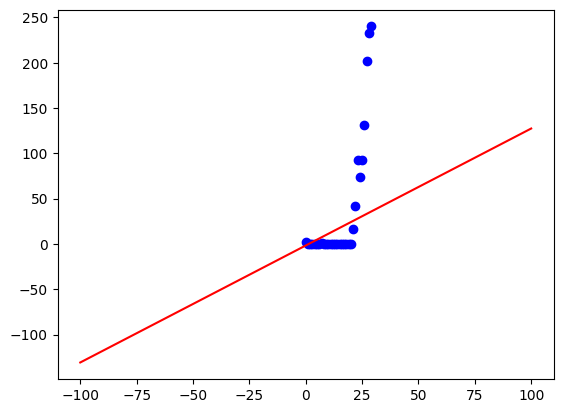

In [113]:
variant3 = vals[:30]
a, b = fit_line(variant3)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant3[:,0], variant3[:,1],  c ="blue")
plt.show()

In [114]:
findR0(a)

1.353808456261628

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = 2.21x + -3.18


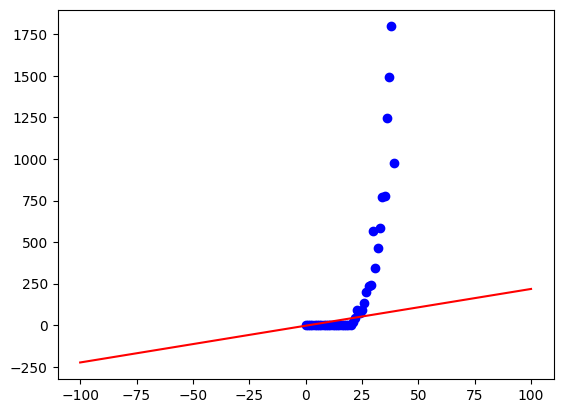

In [115]:
variant4 = vals[:40]
a, b = fit_line(variant4)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant4[:,0], variant4[:,1],  c ="blue")
plt.show()

In [116]:
findR0(a)

1.3991685278527268

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = 2.49x + -3.68


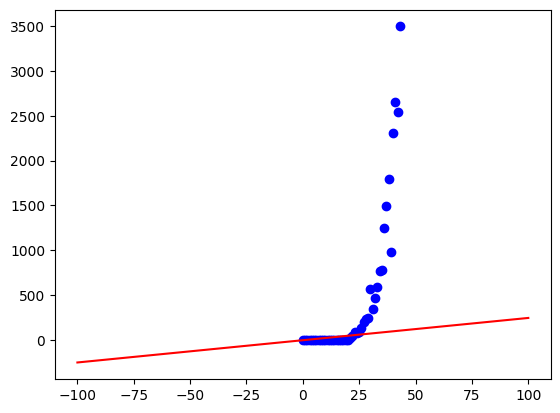

In [117]:
variant5 = vals
a, b = fit_line(variant5)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant5[:,0], variant5[:,1],  c ="blue")
plt.show()

In [118]:
findR0(a)

1.4091894397138214

#Germany

In [119]:
ch_cases = pd.DataFrame()
ch_cases['Date'] = df['date']
ch_cases['Cases'] = df['new_cases']
ch_cases['Location'] = df['location']
ch_cases = ch_cases.loc[(ch_cases['Location'] == 'Germany')]
ch_cases = ch_cases.loc[(ch_cases['Date'] < '2020-03-15')]
ch_cases = ch_cases.drop(columns='Location')
ch_cases = ch_cases.dropna()
ch_cases['Cases'] = ch_cases['Cases'].astype(int)
ch_cases = ch_cases.set_index('Date')['Cases']
ch_cases

Date
2020-01-27      1
2020-01-28      3
2020-01-29      0
2020-01-30      0
2020-01-31      1
2020-02-01      3
2020-02-02      2
2020-02-03      2
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      1
2020-02-08      0
2020-02-09      1
2020-02-10      0
2020-02-11      2
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24      0
2020-02-25      0
2020-02-26      5
2020-02-27      5
2020-02-28     27
2020-02-29     13
2020-03-01     51
2020-03-02     33
2020-03-03     38
2020-03-04     52
2020-03-05    109
2020-03-06    185
2020-03-07    150
2020-03-08    163
2020-03-09    265
2020-03-10    184
2020-03-11    271
2020-03-12    802
2020-03-13    693
2020-03-14    733
Name: Cases, dtype: int64

In [120]:
len(ch_cases)

48

In [121]:
res = ch_cases.to_numpy()
vals = []
for i in range(len(res)):
  vals.append([i, res[i]])
vals =np.array(vals)

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = -0.04x + 0.41


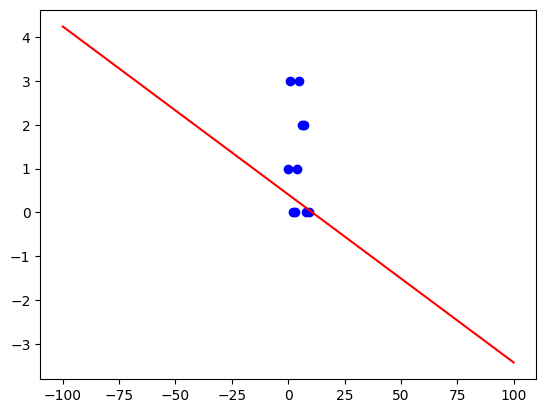

In [122]:
variant1 = vals[:10]
a, b = fit_line(variant1)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant1[:,0], variant1[:,1],  c ="blue")
plt.show()

In [123]:
findR0(a)

0

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = -0.14x + 0.48


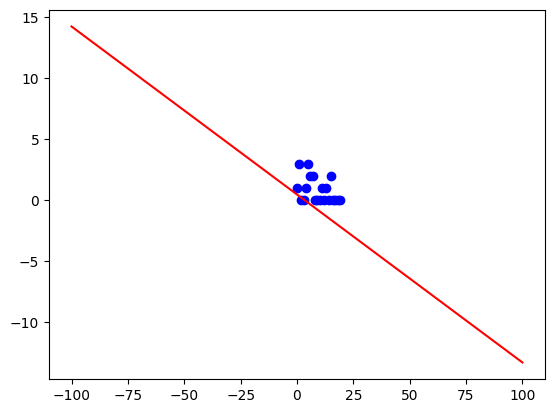

In [124]:
variant2 = vals[:20]
a, b = fit_line(variant2)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant2[:,0], variant2[:,1],  c ="blue")
plt.show()

In [125]:
findR0(a)

0

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = -0.15x + 0.50


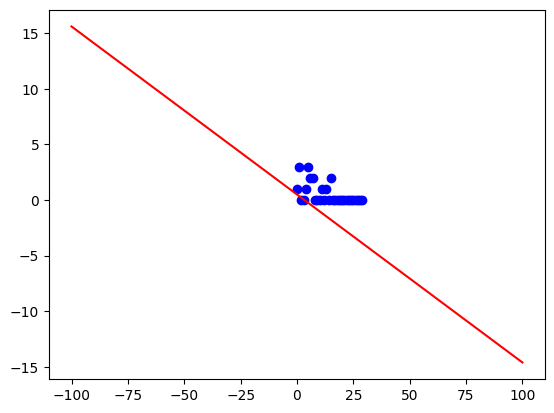

In [126]:
variant3 = vals[:30]
a, b = fit_line(variant3)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant3[:,0], variant3[:,1],  c ="blue")
plt.show()

In [127]:
findR0(a)

0

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = 0.70x + -0.91


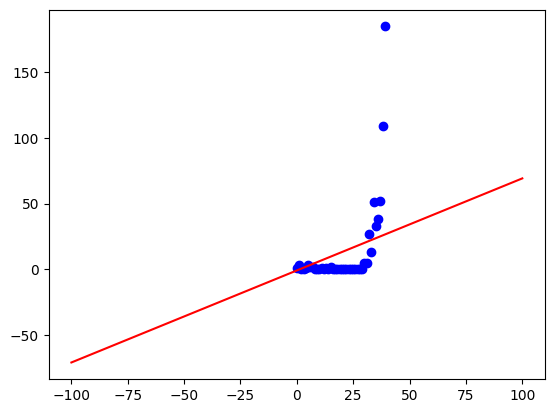

In [128]:
variant4 = vals[:40]
a, b = fit_line(variant4)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant4[:,0], variant4[:,1],  c ="blue")
plt.show()

In [129]:
findR0(a)

1.3044283974359827

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = 1.38x + -2.18


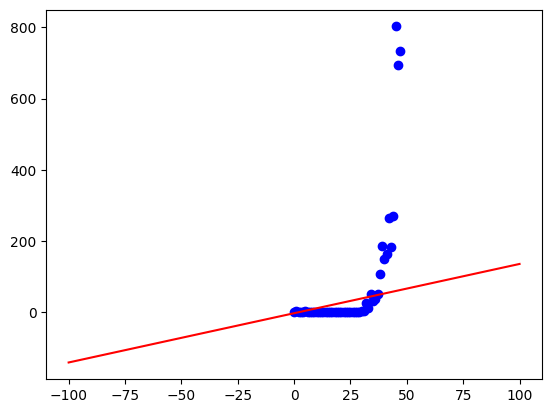

In [130]:
variant5 = vals
a, b = fit_line(variant5)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant5[:,0], variant5[:,1],  c ="blue")
plt.show()

In [131]:
findR0(a)

1.359447314336177

#China

In [132]:
df = pd.read_csv('nc_wuhan.csv', parse_dates=['dates'])

In [133]:
ch_cases = pd.DataFrame()
ch_cases['Date'] = df['dates']
ch_cases['Cases'] = df['new_cases']
ch_cases = ch_cases.loc[(ch_cases['Date'] < '2020-02-12')]
ch_cases = ch_cases.dropna()
ch_cases['Cases'] = ch_cases['Cases'].astype(int)
ch_cases = ch_cases.set_index('Date')['Cases']
ch_cases

Date
2020-01-25      77
2020-01-26      46
2020-01-27      80
2020-01-28     892
2020-01-29     315
2020-01-30     356
2020-01-31     378
2020-02-01     576
2020-02-02     894
2020-02-03    1033
2020-02-04    1242
2020-02-05    1967
2020-02-06    1766
2020-02-07    1501
2020-02-08    1985
2020-02-09    1379
2020-02-10    1920
2020-02-11    1552
Name: Cases, dtype: int64

In [134]:
len(ch_cases)

18

In [135]:
res = ch_cases.to_numpy()
vals = []
for i in range(len(res)):
  vals.append([i, res[i]])
vals =np.array(vals)

y = 1.59x + 4.01


<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


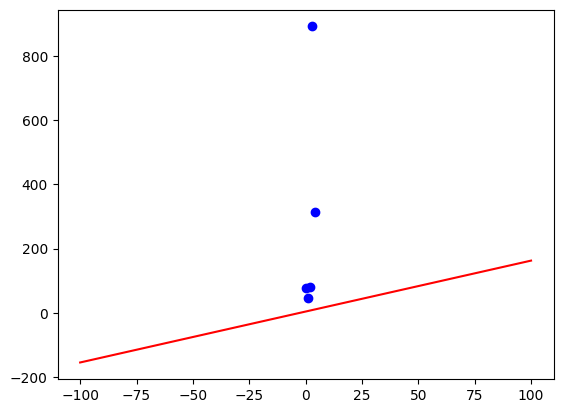

In [136]:
variant1 = vals[:5]
a, b = fit_line(variant1)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant1[:,0], variant1[:,1],  c ="blue")
plt.show()

In [137]:
findR0(a)

1.3709900791909968

y = 1.23x + 4.12


<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


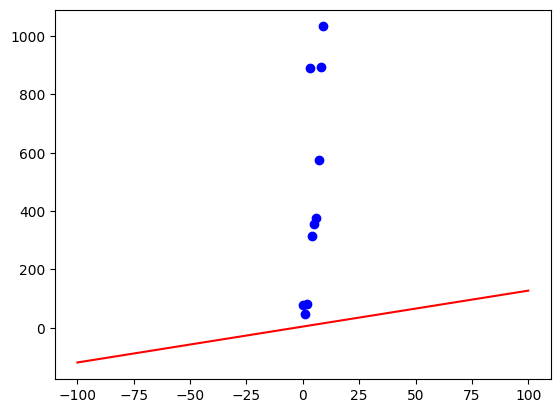

In [138]:
variant2 = vals[:10]
a, b = fit_line(variant2)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant2[:,0], variant2[:,1],  c ="blue")
plt.show()

In [139]:
findR0(a)

1.3499342746138496

<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


y = 0.70x + -0.91


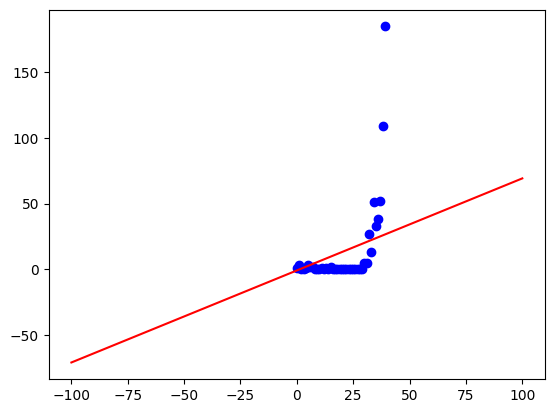

In [140]:
variant3 = vals[:15]
a, b = fit_line(variant4)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant4[:,0], variant4[:,1],  c ="blue")
plt.show()

In [141]:
findR0(a)

1.3044283974359827

y = 1.25x + 4.13


<ipython-input-101-6d84a42716c1>:3: RuntimeWarning: divide by zero encountered in log
  points = np.log(points)


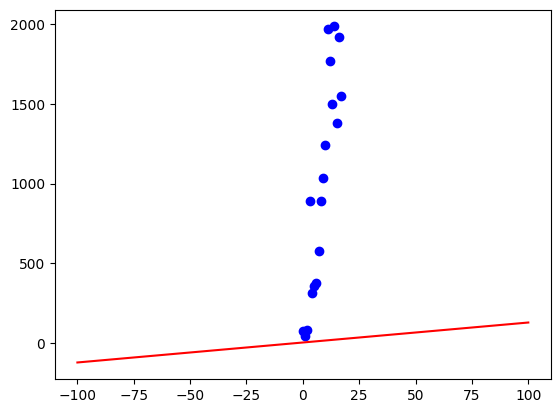

In [142]:
variant4 = vals
a, b = fit_line(variant4)
plt.plot(x,a*x+b,  c ="red")
plt.scatter(variant4[:,0], variant4[:,1],  c ="blue")
plt.show()

In [143]:
findR0(a)

1.3513156841276956